In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import sweetviz as sv

In [34]:
##checking feature description 
feature_des=pd.read_csv("Data_Dictionary.csv")
feature_des

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for th...
3,Bike_Owned,Any bike owned by client (0 means No and 1 mea...
4,Active_Loan,Any other active loan at the time of aplicatio...
5,House_Own,Any house owned by client (0 means No and 1 me...
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied...


In [35]:
#read dataset 
df=pd.read_csv("Dataset.csv")
df.head(5)

/tmp/ipykernel_538/712497165.py:2: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Dataset.csv")


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [37]:
df.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [38]:
#check null value  percentage drop feature with less more than 50 % null value
df.isnull().sum()*100/len(df)

ID                             0.000000
Client_Income                  2.960051
Car_Owned                      2.938715
Bike_Owned                     2.974002
Active_Loan                    2.983029
House_Own                      3.004366
Child_Count                    2.985491
Credit_Amount                  2.980567
Loan_Annuity                   3.948923
Accompany_Client               1.432839
Client_Income_Type             3.037191
Client_Education               2.991236
Client_Marital_Status          2.850085
Client_Gender                  1.980206
Loan_Contract_Type             2.996159
Client_Housing_Type            3.025702
Population_Region_Relative     3.985852
Age_Days                       2.954307
Employed_Days                  2.994518
Registration_Days              2.965796
ID_Days                        4.897584
Own_House_Age                 65.729221
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000


In [39]:
feature_with__excess_null=['Social_Circle_Default','Own_House_Age','Score_Source_1']
df.drop(feature_with__excess_null,axis=1,inplace=True )

In [40]:
df.shape

(121856, 37)

In [41]:
##based on research and information we conclude following are the non relevant features for the prediction and drop the columns
non_relavent_feature=['ID',
'Accompany_Client',
'Client_Marital_Status',
'Mobile_Tag',
'Homephone_Tag',
'Workphone_Working',
'Application_Process_Day',
'Application_Process_Hour',
'Client_Permanent_Match_Tag',
'Client_Contact_Work_Tag',
'Credit_Bureau'
]
df.drop(non_relavent_feature,axis=1,inplace=True)

In [32]:
my_report = sv.analyze(df)
my_report.show_html()

Feature: ID_Days                             |██████▋   | [ 67%]   00:58 -> (00:29 left)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [46]:
# convert object to numerical column 
obj_num=['Client_Income','Credit_Amount','Loan_Annuity','Population_Region_Relative','Age_Days',
        'Employed_Days','Registration_Days','ID_Days','Score_Source_3']
for column in obj_num:
        df[column]=pd.to_numeric(df[column],errors='coerce')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118234 non-null  float64
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118219 non-null  float64
 7   Loan_Annuity                117030 non-null  float64
 8   Client_Income_Type          118155 non-null  object 
 9   Client_Education            118211 non-null  object 
 10  Client_Gender               119443 non-null  object 
 11  Loan_Contract_Type          118205 non-null  object 
 12  Client_Housing_Type         118169 non-null  object 
 13  Population_Reg

In [50]:
df.drop_duplicates(inplace=True)
df = df.replace('XNA', np.nan)

In [55]:
## we will drop rows with NaN values from following columns
columns_to_check = ['Client_Income', 'Client_Income_Type', 'Client_Education', 'Client_Gender',
                     'Loan_Contract_Type', 'Population_Region_Relative','Credit_Amount', 'Loan_Annuity']
df.dropna(subset=columns_to_check,inplace=True)

In [58]:
columns_to_fill_with_zero = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
                               'Employed_Days', 'Registration_Days','ID_Days', 'Age_Days']

# Replace NaN values with 0 in specified columns
df[columns_to_fill_with_zero] = df[columns_to_fill_with_zero].fillna(0)
df.drop_duplicates(inplace=True)

In [59]:
my_report = sv.analyze(df)
my_report.show_html("SWEETVIZ_REPORT_updated.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)

Report SWEETVIZ_REPORT_updated.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [64]:
## From above report we can conclude high pearson correlation between 
#1.Client_family_member vs Child_count - .86
#2. Employed_days vs client_income type - .98
#3. Employed_days vs Type_organisation - .90
#4  Employed_days vs client_occupation - .63

## we will drop these colums - child count,client_income_type,type_organisation

cor_column=['Child_Count','Client_Income_Type','Type_Organization','Client_Occupation']
df.drop(cor_column,axis=1,inplace=True)

In [66]:
## convert categorical features using lable encoder 
columns_to_label_encode = ['Client_Education',
                            'Loan_Contract_Type', 'Client_Housing_Type', 
                            'Client_Gender']

# Apply LabelEncoder to the specified columns
label_encoder = LabelEncoder()

for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])



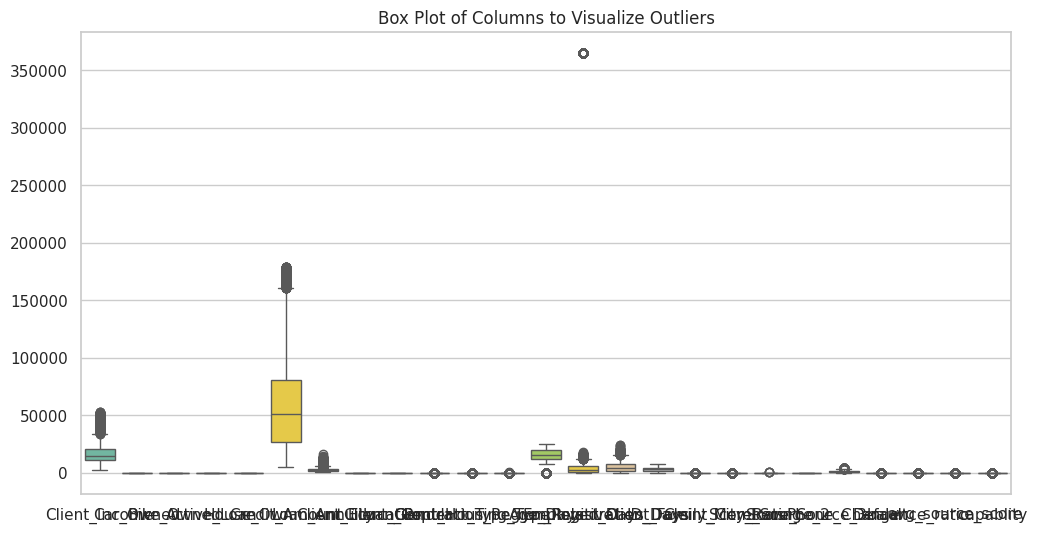

In [81]:
sns.set(style="whitegrid")

# Create box plots for each column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.title('Box Plot of Columns to Visualize Outliers')
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83478 entries, 0 to 121855
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               83478 non-null  float64
 1   Car_Owned                   83478 non-null  float64
 2   Bike_Owned                  83478 non-null  float64
 3   Active_Loan                 83478 non-null  float64
 4   House_Own                   83478 non-null  float64
 5   Credit_Amount               83478 non-null  float64
 6   Loan_Annuity                83478 non-null  float64
 7   Client_Education            83478 non-null  int64  
 8   Client_Gender               83478 non-null  int64  
 9   Loan_Contract_Type          83478 non-null  int64  
 10  Client_Housing_Type         83478 non-null  int64  
 11  Population_Region_Relative  83478 non-null  float64
 12  Age_Days                    83478 non-null  float64
 13  Employed_Days               83478 n

In [69]:
df['Score_Source_2'] = df['Score_Source_2'].fillna(df['Score_Source_3'])
df['Score_Source_3'] = df['Score_Source_3'].fillna(df['Score_Source_2'])

In [74]:
df.dropna(inplace=True)

In [76]:
## few additional column 
df['balance_ratio']=df['Credit_Amount']/df['Client_Income']
df['avg_source_score']=(df['Score_Source_2']+df['Score_Source_3'])/2
df['capablity']=df['Loan_Annuity']/df['Client_Income']



In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83478 entries, 0 to 121855
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               83478 non-null  float64
 1   Car_Owned                   83478 non-null  float64
 2   Bike_Owned                  83478 non-null  float64
 3   Active_Loan                 83478 non-null  float64
 4   House_Own                   83478 non-null  float64
 5   Credit_Amount               83478 non-null  float64
 6   Loan_Annuity                83478 non-null  float64
 7   Client_Education            83478 non-null  int64  
 8   Client_Gender               83478 non-null  int64  
 9   Loan_Contract_Type          83478 non-null  int64  
 10  Client_Housing_Type         83478 non-null  int64  
 11  Population_Region_Relative  83478 non-null  float64
 12  Age_Days                    83478 non-null  float64
 13  Employed_Days               83478 n

In [80]:
#removing outlier 
#1.  Client_income, Credit_amount,Employed days

def remove_outliers_zscore(df, column):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3
    return df[(z_scores < threshold)]

df = remove_outliers_zscore(df, 'Client_Income')
df = remove_outliers_zscore(df, 'Credit_Amount')
df = remove_outliers_zscore(df, 'Employed_Days')



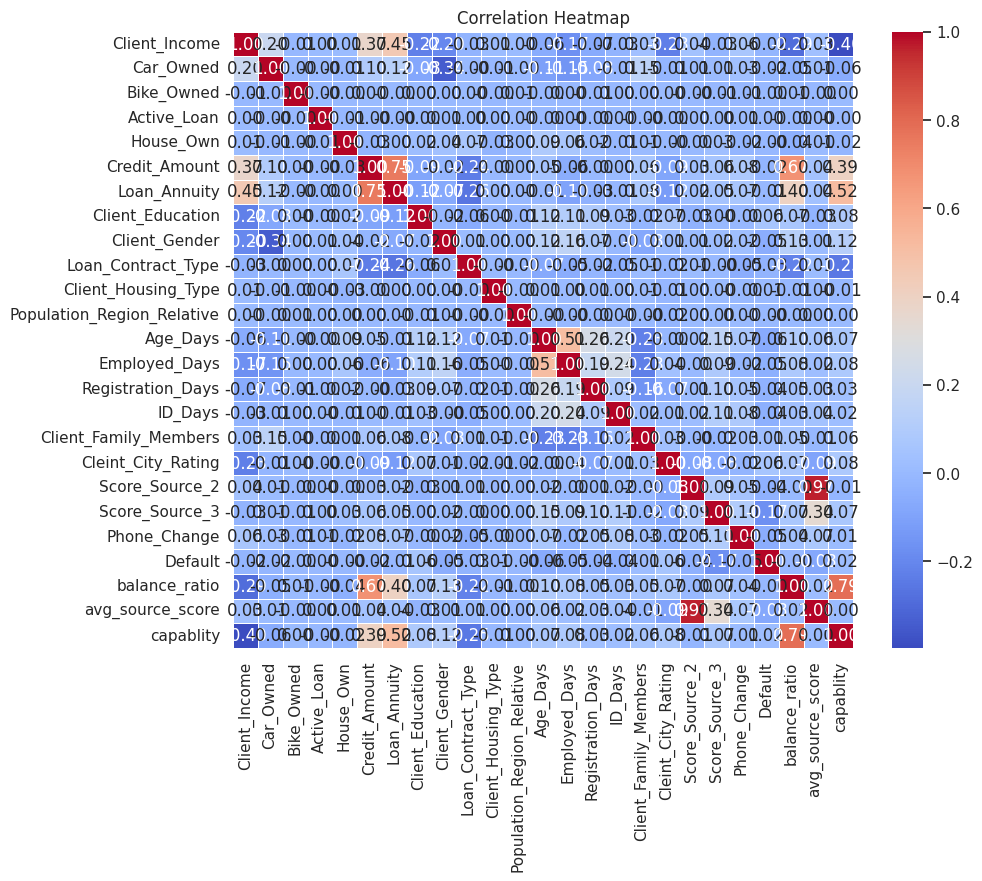

In [82]:
Y=df
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [83]:
file_path = "cleaned_dataset.csv"
df.to_csv(file_path, index=False)

: 